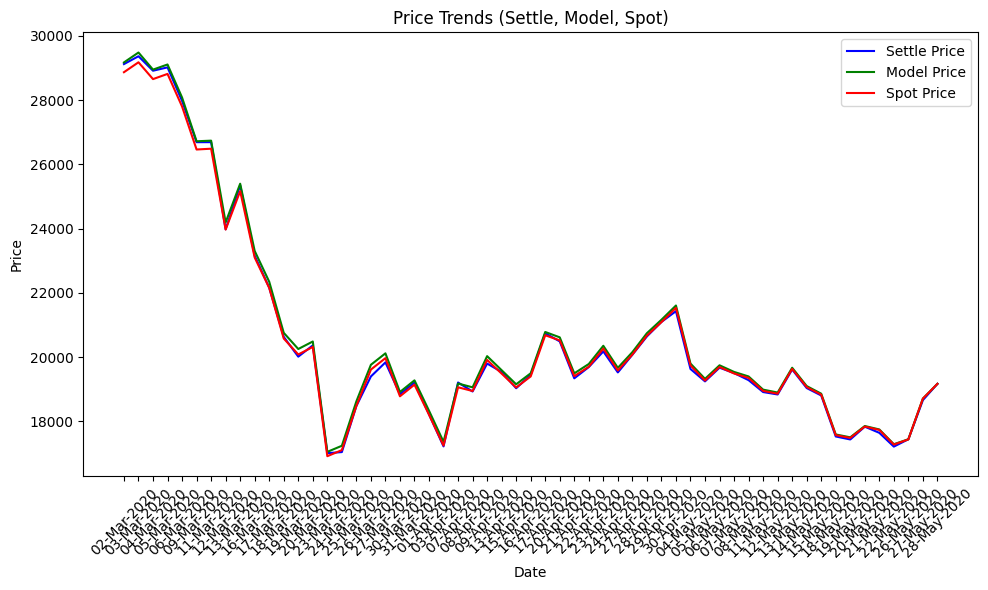

Mean Interest Rate: 4.3999999999999995%
Percentage Error in Interest Rate: 0.00%


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def calculate_prices(settle_price, expiry, underlying_value, interest_rate, current_date):
    interest_rate_decimal = interest_rate / 100
    time_to_expiry = (pd.to_datetime(expiry) - pd.to_datetime(current_date)).days / 365
    model_price = underlying_value * np.exp(interest_rate_decimal * time_to_expiry)
    settle_price = settle_price
    spot_price =underlying_value
    return settle_price, model_price, spot_price
def calculate_error(actual_rate, predicted_rate):
    return abs(actual_rate - predicted_rate) / actual_rate * 100
def process_data(input_file, output_file):
    df = pd.read_csv(input_file)
    prevailing_interest_rate = 4.40 
    results = []
    df.columns = df.columns.str.strip()
    for _, row in df.iterrows():
        settle_price = row['Settle Price']
        expiry = row['Expiry']
        underlying_value = row['Underlying Value']
        current_date = row['Date']

        settle_price, model_price, spot_price = calculate_prices(settle_price, expiry, underlying_value, prevailing_interest_rate, current_date )
        results.append([current_date, settle_price, model_price, spot_price])
    result_df = pd.DataFrame(results, columns=['Date', 'Settle Price', 'Model Price', 'Spot Price'])
    result_df.to_csv(output_file, index=False)
    plt.figure(figsize=(10, 6))
    plt.plot(result_df['Date'], result_df['Settle Price'], label='Settle Price', color='blue')
    plt.plot(result_df['Date'], result_df['Model Price'], label='Model Price', color='green')
    plt.plot(result_df['Date'], result_df['Spot Price'], label='Spot Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Price Trends (Settle, Model, Spot)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    mean_interest_rate = np.mean([prevailing_interest_rate] * len(result_df))
    percentage_error = calculate_error(prevailing_interest_rate, mean_interest_rate)
    print(f"Mean Interest Rate: {mean_interest_rate}%")
    print(f"Percentage Error in Interest Rate: {percentage_error:.2f}%")
input_file = 'FUTIDX_BANKNIFTY_01-Mar-2020_TO_01-Jun-2020.csv'
output_file = 'output_data.csv'

process_data(input_file, output_file)
